# Projeto Final de EA999

# Parte I - Exploração Dataset

Aluno: Otávio Leite Bastos

Prof. Lotufo

## Referências

https://www.kaggle.com/moltean/fruits/data



## Imports

In [ ]:
import numpy as np
import torchvision
import torch
from torch import nn
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
print('GPU available:', device)

GPU available: cuda


## Extração dos Dados

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
root = 'fruits-360_dataset/fruits-360/'

In [ ]:
!unzip -q -n "/gdrive/Shared drives/Drive compartilhado EA999/fruits.zip"

## Carregando Dados

In [ ]:
image_data_train_view = ImageFolder(root + 'Training/', transform=T.ToTensor())
image_data_test_view = ImageFolder(root + 'Test/', transform=T.ToTensor())

In [ ]:
train_loader_view = DataLoader(dataset=image_data_train_view,
                          batch_size=20,
                          shuffle=False)

test_loader_view = DataLoader(dataset=image_data_test_view,
                         batch_size=20,
                         shuffle=False)

## Explorando Dados

### Métricas Essenciais

In [ ]:
# Total classes
classes_idx = image_data_train_view.class_to_idx
classes = len(image_data_train_view.classes)

print('Total Classes: ', classes)

len_train_data = len(image_data_train_view)
len_test_data = len(image_data_test_view)

def get_labels():
    labels_train = [] # All the labels
    labels_test = []
    for i in image_data_train_view.imgs:
        labels_train.append(i[1])
    
    for j in image_data_test_view.imgs:
        labels_test.append(j[1])
    
    return (labels_train, labels_test)

labels_train, labels_test = get_labels()

print('Training Dataset Size: ', len(labels_train))
print('Training Dataset Size: ', len(labels_test))

Total Classes:  120
Training Dataset Size:  60498
Training Dataset Size:  20622


In [ ]:
# Taken from https://stackoverflow.com/questions/48547660/attributeerror-module-pil-image-has-no-attribute-register-extensions#comment85629134_48774620
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions


print (iter(train_loader_view).next()[0].shape)
record = iter(train_loader_view).next()[0]

torch.Size([20, 3, 100, 100])


In [ ]:
(x,y) = iter(train_loader_view).next()
print(x.shape, y.shape)

torch.Size([20, 3, 100, 100]) torch.Size([20])


Percebe-se que tanto o conjunto de treinamento, quanto o conjunto de teste possuem 3 canais, sendo as imagens de dimensão 100x100.

In [ ]:
classes = image_data_train_view.class_to_idx.keys()

indexes = image_data_train_view.class_to_idx.values()

count_train = []

count_test = []

image_unique_list=[]

index = 0

for i in indexes:

  image_unique_list.append(image_data_train_view[index])

  index += image_data_train_view.targets.count(i) + 1

  count_train.append(image_data_train_view.targets.count(i))

  count_test.append(image_data_test_view.targets.count(i))

print(len(image_unique_list))

print(count_train)

print(count_test)

120
[492, 444, 492, 492, 481, 492, 456, 492, 492, 429, 490, 492, 672, 492, 427, 491, 490, 450, 490, 450, 462, 490, 492, 492, 490, 702, 492, 738, 738, 492, 492, 492, 450, 490, 490, 490, 468, 99, 490, 984, 492, 490, 490, 492, 471, 490, 492, 490, 464, 490, 490, 466, 471, 490, 492, 490, 490, 490, 490, 490, 426, 300, 490, 738, 492, 492, 480, 218, 178, 450, 445, 438, 479, 492, 490, 492, 738, 492, 492, 490, 702, 300, 490, 666, 490, 490, 444, 666, 666, 492, 492, 490, 493, 490, 447, 420, 900, 492, 450, 450, 453, 450, 450, 490, 492, 490, 492, 490, 492, 738, 490, 490, 738, 672, 738, 479, 492, 367, 459, 735]
[164, 148, 164, 164, 161, 164, 152, 164, 164, 144, 166, 164, 219, 164, 143, 166, 166, 152, 166, 150, 154, 166, 164, 164, 166, 234, 164, 246, 246, 164, 164, 164, 153, 166, 166, 166, 156, 99, 166, 328, 164, 166, 166, 164, 158, 166, 164, 166, 157, 166, 166, 156, 157, 166, 164, 166, 166, 166, 166, 166, 142, 102, 166, 246, 164, 164, 160, 218, 178, 150, 155, 146, 160, 164, 166, 164, 246, 164, 164, 1

### Histograma

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


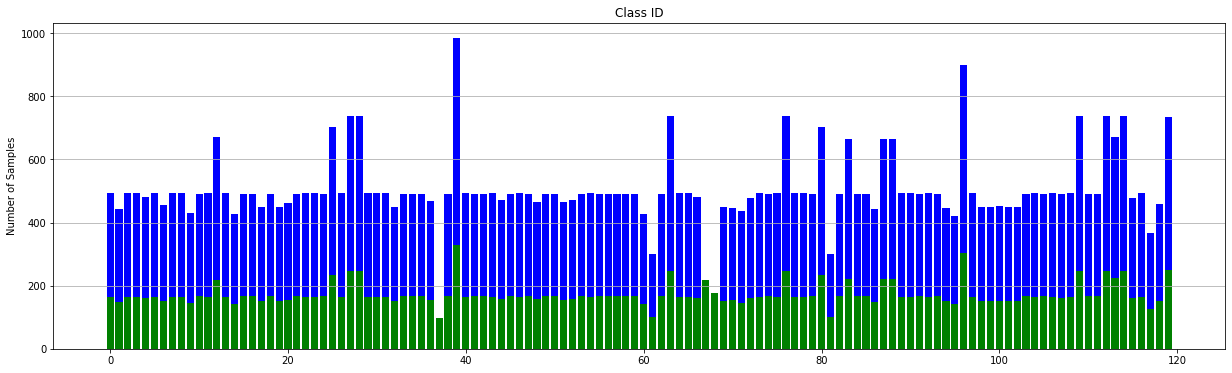

In [ ]:
plt.figure(figsize=(21,6))
plt.title('Class ID')
plt.ylabel('Number of Samples')
ax = plt.axes()        
ax.yaxis.grid() # horizontal lines
plt.bar(np.arange(len(image_data_train_view.classes)), count_train, color='blue')
plt.bar(np.arange(len(image_data_train_view.classes)), count_test, color='green')
plt.show()

### Visualizando Dados

In [ ]:
view_loader = DataLoader(dataset=image_unique_list,
                         batch_size=120,
                          shuffle=False)

In [ ]:
(i,j) = iter(view_loader).next()
print(i.shape, j.shape)

torch.Size([120, 3, 100, 100]) torch.Size([120])


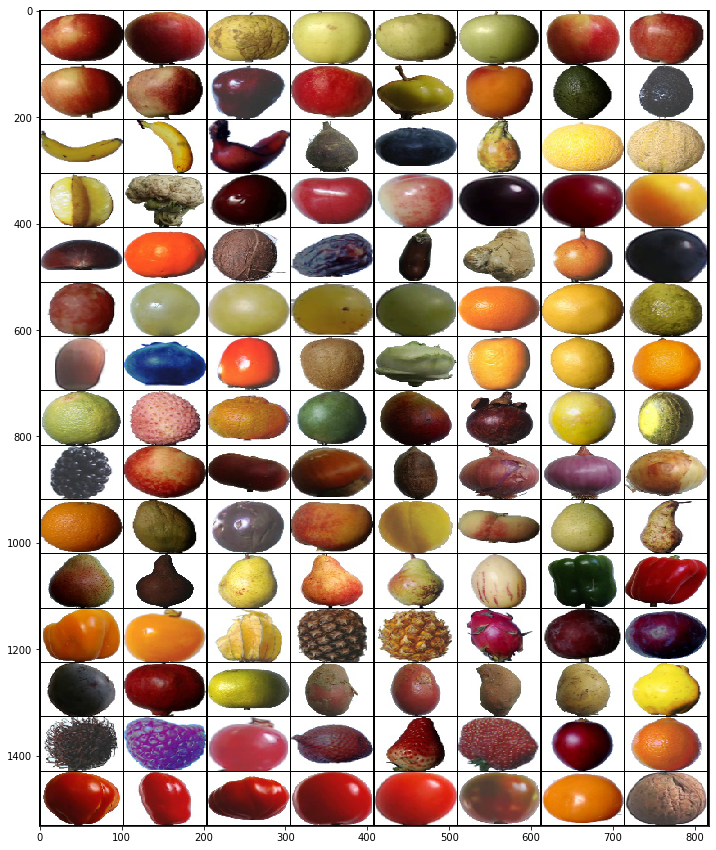

In [ ]:
grid_img = torchvision.utils.make_grid(i, nrow=8);

plt.figure(figsize = (12,15))
plt.imshow(grid_img.permute(1, 2, 0), aspect='auto');

### Desvio Padrão e Média dos Dados

In [ ]:
# taken from https://discuss.pytorch.org/t/about-normalization-using-pre-trained-vgg16-networks/23560/6

def get_mean_std_of_loader(loader):
  mean = 0.
  std = 0.
  nb_samples = 0.

  for data,_ in loader:

      batch_samples = data.size(0)
      data = data.view(batch_samples, data.size(1), -1)
      mean += data.mean(2).sum(0)
      std += data.std(2).sum(0)
      nb_samples += batch_samples

  mean /= nb_samples
  std /= nb_samples

  return mean, std

In [ ]:
train_mean, train_std  = get_mean_std_of_loader(train_loader_view)
print('TRAIN')
print('Train Mean: ', train_mean)
print('Train Standard Deviation: ', train_std)

test_mean, test_std  = get_mean_std_of_loader(test_loader_view)
print('TEST')
print('Test Mean: ', test_mean)
print('Test Standard Deviation: ', test_std)

TRAIN
Train Mean:  tensor([0.6837, 0.5736, 0.4956])
Train Standard Deviation:  tensor([0.2552, 0.3199, 0.3643])
TEST
Test Mean:  tensor([0.6905, 0.5851, 0.5086])
Test Standard Deviation:  tensor([0.2566, 0.3210, 0.3669])
